### Student Information
Name: 林昊謙

Student ID: 112065533

GitHub ID: Orpheus2401

---

# Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__.



---



# **1. First part**

In [1]:
### Begin Assignment Here
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

> ## **Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information.

In [2]:
#Answer here
X[X['category_name'] == 'alt.atheism']

,text,category,category_name
12,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
17,Organization: Penn State University From: <JSN...,0,alt.atheism
19,Subject: Re: Don't more innocents die without ...,0,alt.atheism
21,From: gmiller@worldbank.org (Gene C. Miller) S...,0,alt.atheism
...,...,...,...
2231,"Subject: Re: Feminism and Islam, again From: k...",0,alt.atheism
2233,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
2234,From: David.Rice@ofa123.fidonet.org Subject: i...,0,alt.atheism
2237,From: datepper@phoenix.Princeton.EDU (David Aa...,0,alt.atheism


> ## **Exercise 5 (take home)**
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
# Answer here
# Because item C, D and F are strings, even empty string is still valid value for `.isnull()`.

> ## **Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
X_sample[0:5]

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism


In [7]:
# Answer here
# The indices are disordered.

> ## **Exercise 8 (take home):**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Category distribution'}>

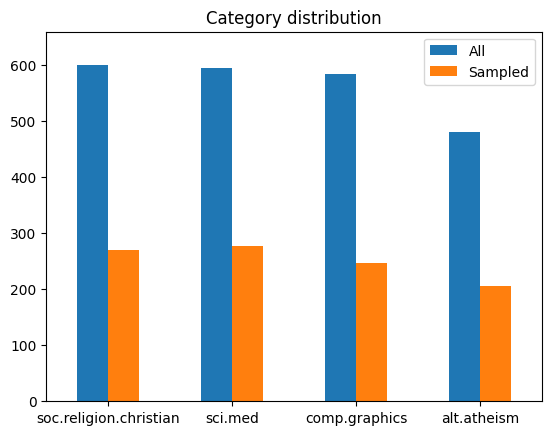

In [132]:
# Answer here
all = X.category_name.value_counts().to_frame().T
all.index = ['All']
sampled = X_sample.category_name.value_counts().to_frame().T
sampled.index = ['Sampled']
max_counts = max(pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()]))

pd.concat([all, sampled]).T.plot.bar(title='Category distribution',
                                     ylim = [0, max_counts + max_counts/10],
                                     rot=0)

> ## **Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()

In [13]:
# Answer here
for i in range(5):
    for j in range(100):
        if X_counts[i, j] >= 1:
            print(count_vect.get_feature_names_out()[j])

00
01


> ## **Exercise 11 (take home):**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [14]:
# top twenty frequencies only
plot_x = ["top_"+str(i+1)+"_freq" for i in list(X.index)[0:20]]
print(plot_x)

['top_1_freq', 'top_2_freq', 'top_3_freq', 'top_4_freq', 'top_5_freq', 'top_6_freq', 'top_7_freq', 'top_8_freq', 'top_9_freq', 'top_10_freq', 'top_11_freq', 'top_12_freq', 'top_13_freq', 'top_14_freq', 'top_15_freq', 'top_16_freq', 'top_17_freq', 'top_18_freq', 'top_19_freq', 'top_20_freq']


In [15]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [16]:
# X_counts[no. of doc., top no. freq. of corresponding doc.]
X_crop = X_counts[:20, :].toarray()
X_crop.sort(axis=1)
plot_z = X_crop[:, ::-1][:20, :20]
print(plot_z)

[[ 5  4  4  3  3  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1]
 [11 10  8  5  4  4  4  3  3  3  3  3  2  2  2  2  2  2  2  2]
 [26 14 14 13 10  9  9  8  8  8  8  7  7  7  7  6  6  6  6  5]
 [ 6  4  3  3  3  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1]
 [10  8  6  4  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2]
 [14 12 12 10  7  7  6  5  5  5  4  4  4  4  4  3  3  3  3  2]
 [ 8  7  7  5  5  5  4  4  4  4  4  4  4  4  4  4  4  3  3  3]
 [21 11 11 11 10  9  9  8  7  6  5  5  5  5  4  4  4  4  4  4]
 [ 6  6  6  5  5  5  4  4  4  4  3  3  3  3  3  2  2  2  2  2]
 [23 21 18 18 16 12 10  9  9  8  8  7  7  7  7  7  6  6  6  6]
 [31 25 22 18 15 15 13 11  9  9  9  8  8  8  7  7  6  6  6  6]
 [ 5  5  4  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2]
 [35 26 23 22 19 17 16 16 16 13 12 11 11 11  9  9  9  8  7  7]
 [ 4  3  3  3  3  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1]
 [ 5  4  4  3  3  3  3  3  2  2  2  2  2  2  2  2  2  2  2  2]
 [ 3  2  2  2  2  2  2  2  2  2  2  2  1  1  1  1  1  1

,top_1_freq,top_2_freq,top_3_freq,top_4_freq,top_5_freq,top_6_freq,top_7_freq,top_8_freq,top_9_freq,top_10_freq,top_11_freq,top_12_freq,top_13_freq,top_14_freq,top_15_freq,top_16_freq,top_17_freq,top_18_freq,top_19_freq,top_20_freq
doc_0,5,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1
doc_1,11,10,8,5,4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2
doc_2,26,14,14,13,10,9,9,8,8,8,8,7,7,7,7,6,6,6,6,5
doc_3,6,4,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1
doc_4,10,8,6,4,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2
doc_5,14,12,12,10,7,7,6,5,5,5,4,4,4,4,4,3,3,3,3,2
doc_6,8,7,7,5,5,5,4,4,4,4,4,4,4,4,4,4,4,3,3,3
doc_7,21,11,11,11,10,9,9,8,7,6,5,5,5,5,4,4,4,4,4,4
doc_8,6,6,6,5,5,5,4,4,4,4,3,3,3,3,3,2,2,2,2,2
doc_9,23,21,18,18,16,12,10,9,9,8,8,7,7,7,7,7,6,6,6,6


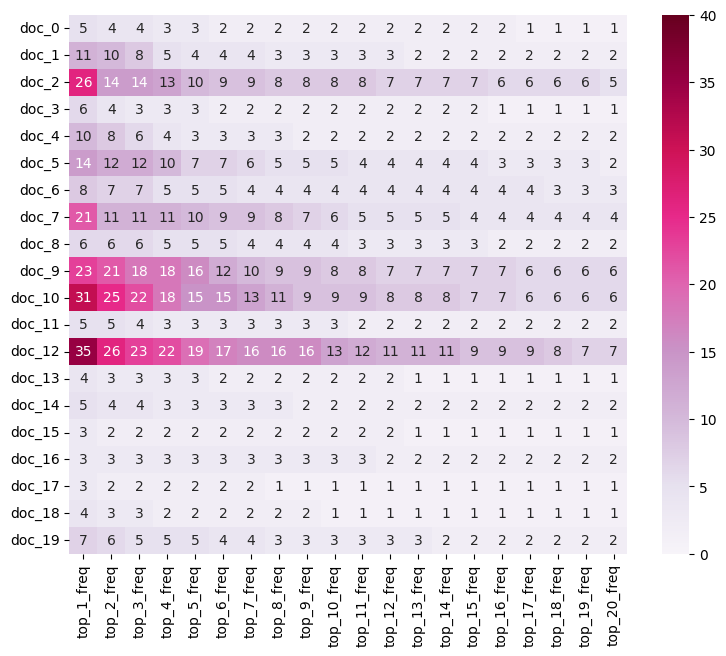

In [17]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=40, annot=True)

> ## **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'blue', 'black', 'orange']
X_re3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

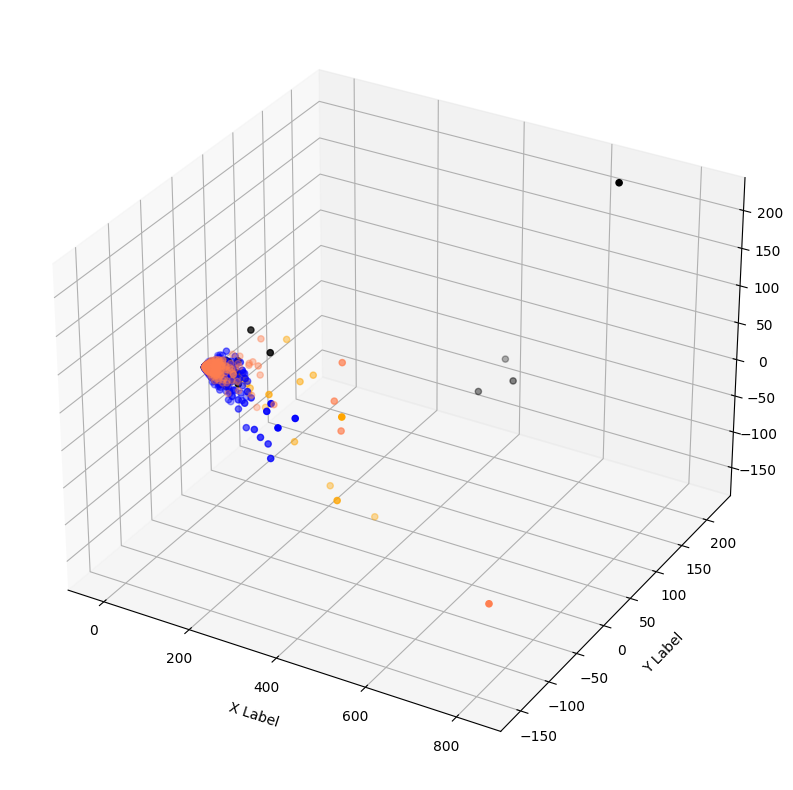

In [19]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_re3d[X['category_name'] == category].T[0]
    ys = X_re3d[X['category_name'] == category].T[1]
    zs = X_re3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

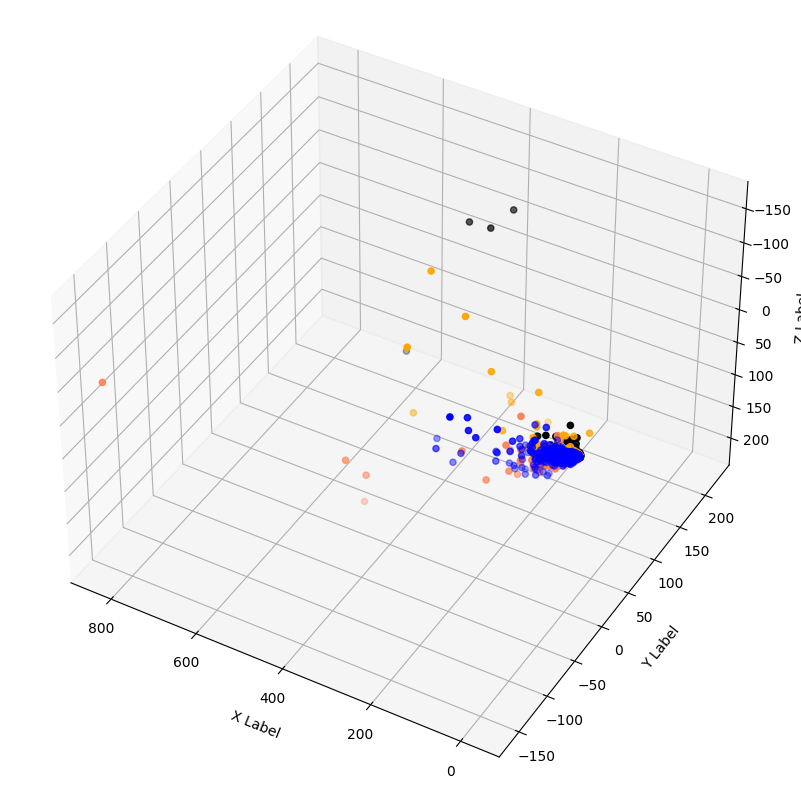

In [20]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_re3d[X['category_name'] == category].T[0]
    ys = X_re3d[X['category_name'] == category].T[1]
    zs = X_re3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(-140, 60)
fig.show()

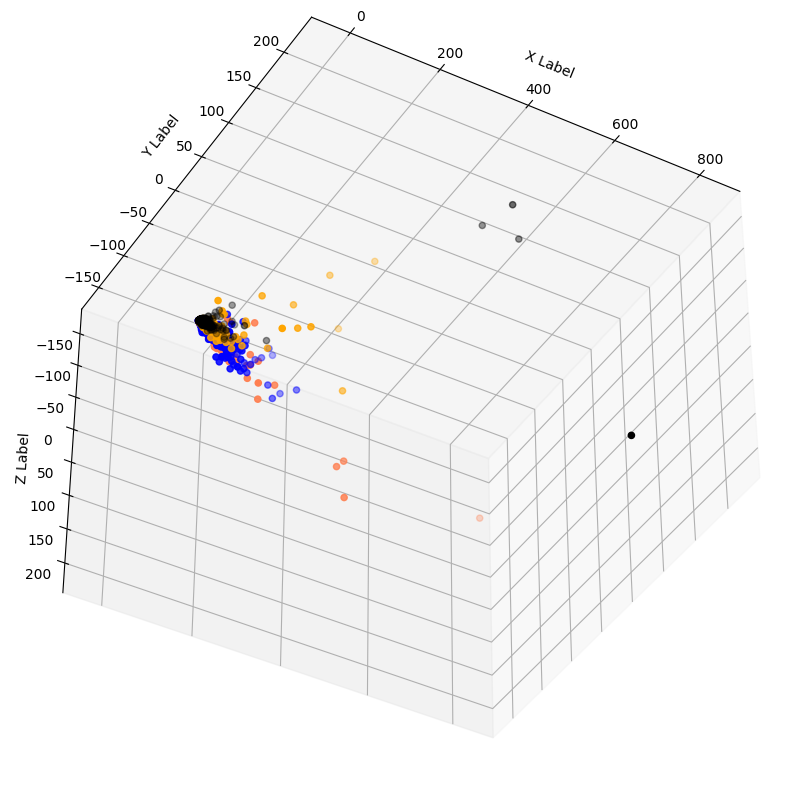

In [21]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, category in zip(col, categories):
    xs = X_re3d[X['category_name'] == category].T[0]
    ys = X_re3d[X['category_name'] == category].T[1]
    zs = X_re3d[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(140, -60)
plt.show()

> ## **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [22]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

35788


In [23]:
# install plotly Dash
!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.3 MB/s eta 0:00:00


In [24]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go

In [25]:
# need to execute the block to get correct figure

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Range of bars:"),
    dcc.RangeSlider(id="range_slider", min=0, max=3000, value=[0, 300], step=100,
                    pushable=100, marks=None, tooltip={"placement":"bottom", "always_visible": True}),
])

@app.callback(
    Output("graph", "figure"),
    Input("range_slider", "value"))
def update_bar_chart(interval):
    data = term_frequencies[interval[0]:interval[1]] # replace with your own data source
    fig = go.Figure(
        data=[go.Bar(y=data)],
        layout_title_text="Interactive term frequencies chart"
    )
    return fig

app.run_server()

<IPython.core.display.Javascript object>

> ## **Exercise 14 (take home):**
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.


[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '01'),
 Text(3, 0, '02'),
 Text(4, 0, '03'),
 Text(5, 0, '0358'),
 Text(6, 0, '04'),
 Text(7, 0, '05'),
 Text(8, 0, '07'),
 Text(9, 0, '08'),
 Text(10, 0, '09'),
 Text(11, 0, '10'),
 Text(12, 0, '100'),
 Text(13, 0, '1000'),
 Text(14, 0, '11'),
 Text(15, 0, '12'),
 Text(16, 0, '128'),
 Text(17, 0, '129'),
 Text(18, 0, '13'),
 Text(19, 0, '130'),
 Text(20, 0, '14'),
 Text(21, 0, '15'),
 Text(22, 0, '150'),
 Text(23, 0, '16'),
 Text(24, 0, '17'),
 Text(25, 0, '18'),
 Text(26, 0, '19'),
 Text(27, 0, '192'),
 Text(28, 0, '1987'),
 Text(29, 0, '1988'),
 Text(30, 0, '1989'),
 Text(31, 0, '1990'),
 Text(32, 0, '1991'),
 Text(33, 0, '1992'),
 Text(34, 0, '1993'),
 Text(35, 0, '1993apr14'),
 Text(36, 0, '1993apr15'),
 Text(37, 0, '1993apr16'),
 Text(38, 0, '1993apr17'),
 Text(39, 0, '1993apr19'),
 Text(40, 0, '1993apr22'),
 Text(41, 0, '1993apr3'),
 Text(42, 0, '1993apr5'),
 Text(43, 0, '1st'),
 Text(44, 0, '20'),
 Text(45, 0, '200'),
 Text(46,

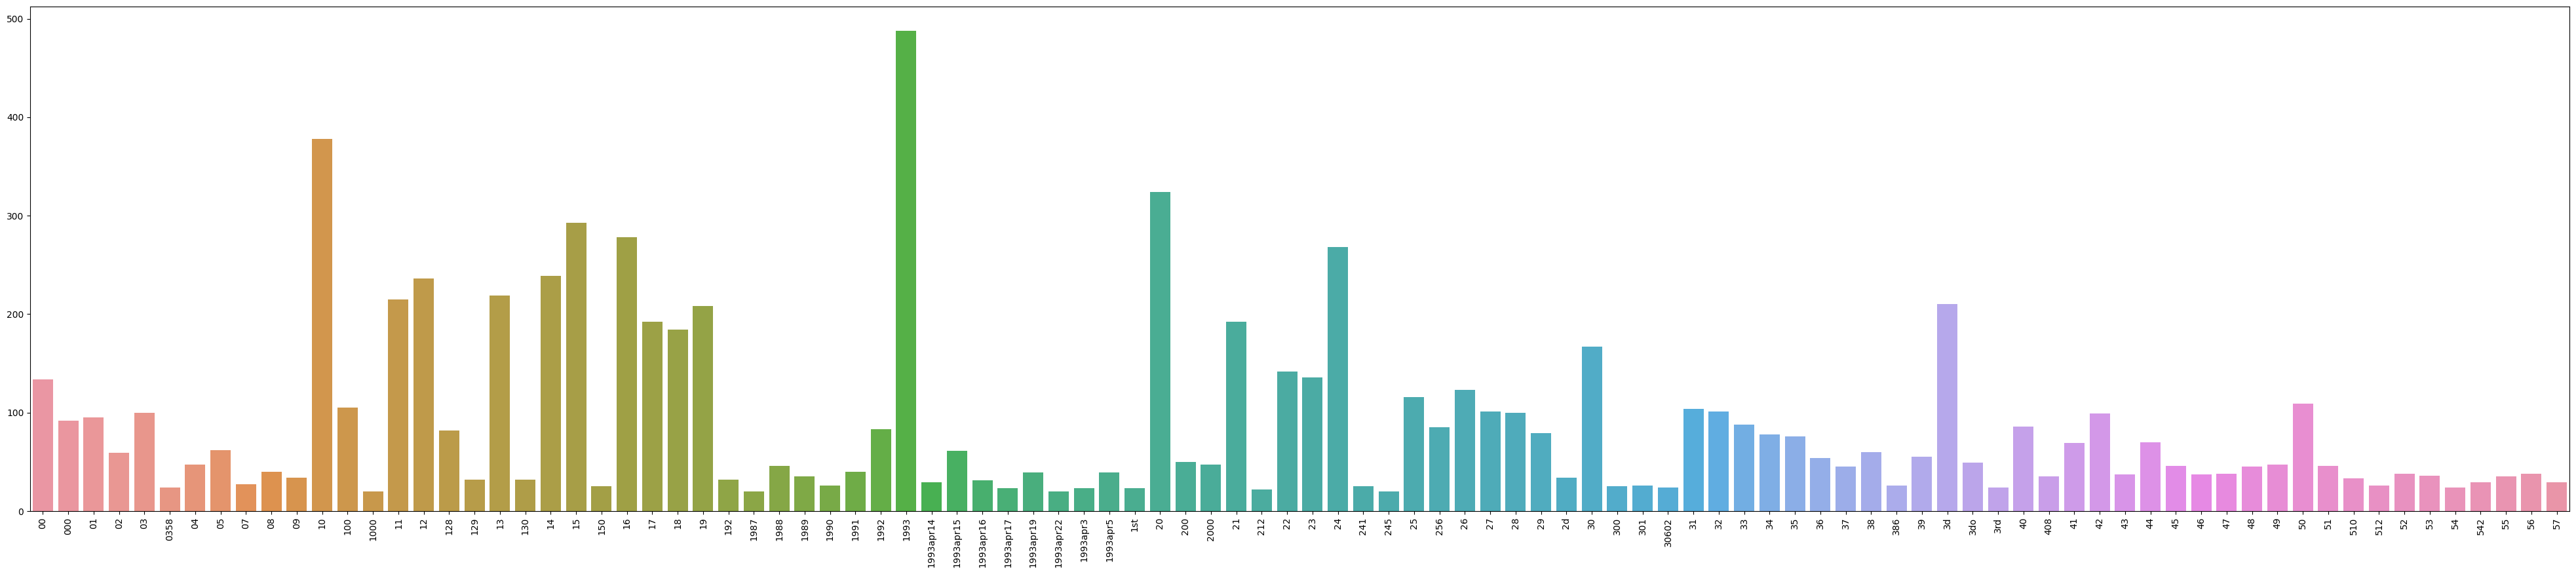

In [204]:
# fetch features with freq. greater than 20, showing first 100 features
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[term_frequencies[:] >= 20][:100],
            y=term_frequencies[term_frequencies[:] >= 20][:100])
g.set_xticklabels(count_vect.get_feature_names_out()[term_frequencies[:] >= 20][:100], rotation = 90)

> ## **Exercise 15 (take home):**
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [27]:
desc_index = np.argsort(term_frequencies)[::-1]
desc_freq = np.sort(term_frequencies)[::-1]
desc_name = []
for i in range(300):
    desc_name.append(count_vect.get_feature_names_out()[desc_index[i]])

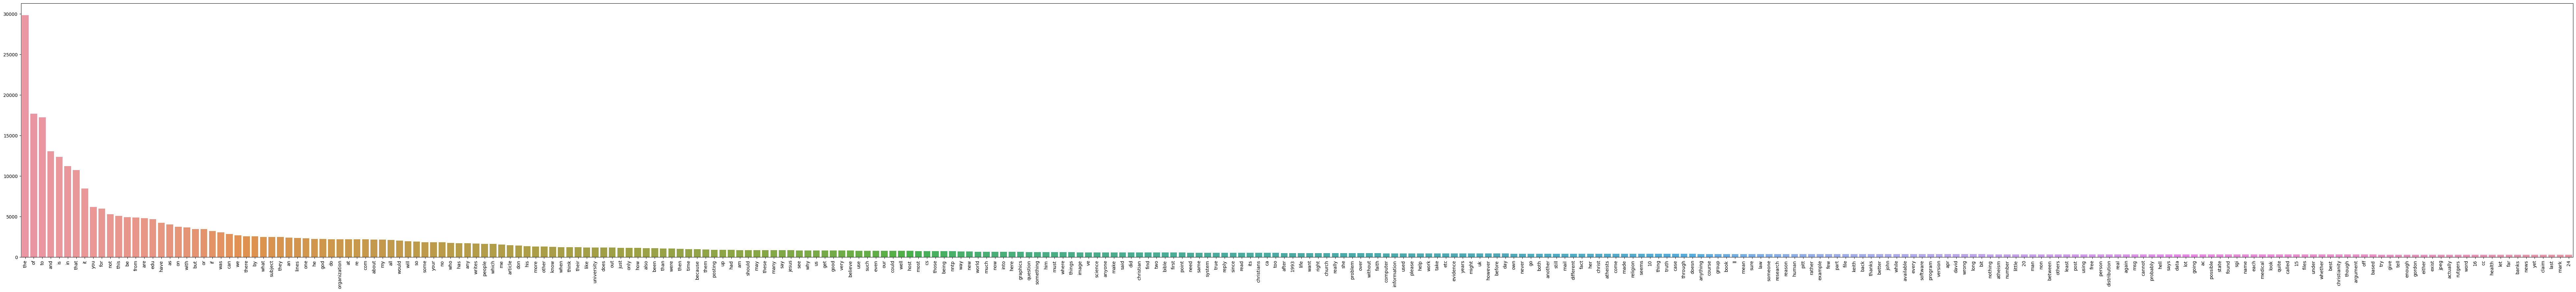

In [28]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=desc_name[:300],
                y=desc_freq[:300])
g.set_xticklabels(desc_name[:300], rotation = 90);

> ## **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [29]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [30]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# Working just fine :)

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"




---



# **2. Second part**

### Data Preparation

In [31]:
import glob
# import files into one dataframe
files = glob.glob("sentiment_labelled_sentences/*.txt")
new_data = pd.concat([pd.read_csv(f, sep='\t', header=None, quoting=3) for f in files], ignore_index=True)
new_data.columns = ['sentence', 'score']

In [32]:
len(new_data)

3000

In [33]:
new_data[0:2]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1


In [34]:
for s in new_data['sentence'][:3]:
    print(s)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### Adding Column

In [35]:
# add new column
def classify_sentiment(r):
    return 'positive' if r['score'] == 1 else 'negative'
new_data['sentiment'] = new_data.apply(lambda r: classify_sentiment(r), axis=1)

### Make some Queries

In [36]:
# simple query
new_data[0:10][["sentence", "sentiment"]]

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive
5,I have to jiggle the plug to get it to line up...,negative
6,If you have several dozen or several hundred c...,negative
7,If you are Razr owner...you must have this!,positive
8,"Needless to say, I wasted my money.",negative
9,What a waste of money and time!.,negative


In [37]:
# simple query
new_data[-10:]

,sentence,score,sentiment
2990,The refried beans that came with my meal were ...,0,negative
2991,Spend your money and time some place else.,0,negative
2992,A lady at the table next to us found a live gr...,0,negative
2993,the presentation of the food was awful.,0,negative
2994,I can't tell you how disappointed I was.,0,negative
2995,I think food should have flavor and texture an...,0,negative
2996,Appetite instantly gone.,0,negative
2997,Overall I was not impressed and would not go b...,0,negative
2998,"The whole experience was underwhelming, and I ...",0,negative
2999,"Then, as if I hadn't wasted enough of my life ...",0,negative


In [38]:
# using loc
new_data.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [39]:
# using iloc
new_data.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [40]:
# query
new_data[new_data['score'] == 1]

,sentence,score,sentiment
1,"Good case, Excellent value.",1,positive
2,Great for the jawbone.,1,positive
4,The mic is great.,1,positive
7,If you are Razr owner...you must have this!,1,positive
10,And the sound quality is great.,1,positive
...,...,...,...
2899,"Overall, a great experience.",1,positive
2901,Their regular toasted bread was equally satisf...,1,positive
2907,The chips and sals a here is amazing!!!!!!!!!!...,1,positive
2909,This is my new fav Vegas buffet spot.,1,positive


In [41]:
# sentences with positive sentiment, query every 10th record, only show first 5 records.
new_data[new_data['sentiment'] == 'positive'].iloc[::10][:5]

,sentence,score,sentiment
1,"Good case, Excellent value.",1,positive
21,I bought this to use with my Kindle Fire and a...,1,positive
44,Excellent bluetooth headset.,1,positive
61,I really recommend this faceplates since it lo...,1,positive
78,"I love this phone , It is very handy and has a...",1,positive


### Missing Values

In [42]:
# check missing values
new_data.isna()

,sentence,score,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [43]:
# check total missing values amount by columns
new_data.isna().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,sentiment
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


In [44]:
# check total missing values amount by rows
new_data.isna().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amount of missing records is: , 0)
1       (The amount of missing records is: , 0)
2       (The amount of missing records is: , 0)
3       (The amount of missing records is: , 0)
4       (The amount of missing records is: , 0)
                         ...                   
2995    (The amount of missing records is: , 0)
2996    (The amount of missing records is: , 0)
2997    (The amount of missing records is: , 0)
2998    (The amount of missing records is: , 0)
2999    (The amount of missing records is: , 0)
Length: 3000, dtype: object

In [45]:
# create dummy record
dummy_series = pd.Series(["dummy_sentence", 0], index=["sentence", "score"])
dummy_series

sentence    dummy_sentence
score                    0
dtype: object

In [46]:
# convert to frame
dummy_series.to_frame().T

,sentence,score
0,dummy_sentence,0


In [47]:
# concat into a new dataframe
result_with_series = pd.concat([new_data, dummy_series.to_frame().T], ignore_index=True)
# check records number
print(len(result_with_series))
result_with_series.isna().apply(lambda x: dmh.check_missing_values(x))

3001


,sentence,score,sentiment
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,1


In [48]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_sentence',
               'score': 0
              }]

In [49]:
# concat dataframe inplace
new_data = pd.concat([new_data, pd.DataFrame(dummy_dict)], ignore_index=True)
print(len(new_data))
new_data.isna().apply(lambda x: dmh.check_missing_values(x))

3001


,sentence,score,sentiment
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,1


In [50]:
# drop missing value
new_data.dropna(inplace=True)
print(len(new_data))
new_data.isna().apply(lambda x: dmh.check_missing_values(x))

3000


,sentence,score,sentiment
0,The amount of missing records is:,The amount of missing records is:,The amount of missing records is:
1,0,0,0


### Duplicated Data

In [51]:
# check duplicated
new_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [52]:
sum(new_data.duplicated('sentence'))

17

In [53]:
# duplicated records
duplicated_dict = [{
                        'sentence': 'dummy_sentence',
                        'score': 2,
                        'sentiment': 'neutral'
                    },
                    {
                        'sentence': 'dummy_sentence',
                        'score': 2,
                        'sentiment': 'neutral'
                    }]

In [54]:
new_data = pd.concat([new_data, pd.DataFrame(duplicated_dict)], ignore_index=True)
print(len(new_data))
sum(new_data.duplicated())

3002


18

In [55]:
# keep first and drop other duplicated
new_data.drop_duplicates(inplace=True)
new_data.drop(3000, inplace=True) # drop the other dummy record
print(len(new_data))

2983


### Sampling

In [56]:
# sampling
print(new_data.shape)
new_sample = new_data.sample(n=1000, random_state=42)
display(new_sample)
len(new_sample)

(2983, 3)


,sentence,score,sentiment
2423,We've tried to like this place but after 10+ t...,0,negative
1558,The script is a big flawed mess.,0,negative
889,It was that loud.Glad to say that the Plantron...,1,positive
332,The reception is excellent!,1,positive
1850,Now imagine that every single one of those dec...,0,negative
...,...,...,...
926,It looses connection to the phone even when it...,0,negative
1221,There are the usual Hitchcock logic flaws.,0,negative
2724,Awesome selection of beer.,1,positive
2470,"Very good, though!",1,positive


1000

In [57]:
# sample query
new_sample[:5]

,sentence,score,sentiment
2423,We've tried to like this place but after 10+ t...,0,negative
1558,The script is a big flawed mess.,0,negative
889,It was that loud.Glad to say that the Plantron...,1,positive
332,The reception is excellent!,1,positive
1850,Now imagine that every single one of those dec...,0,negative


negative    1493
positive    1490
Name: sentiment, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}>

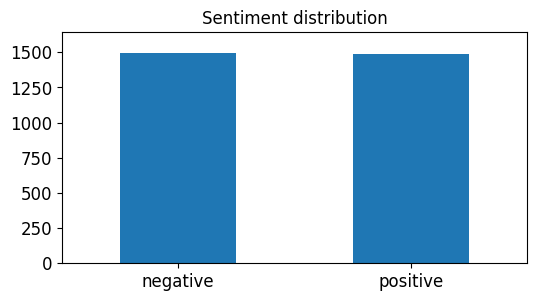

In [58]:
print(new_data.sentiment.value_counts())

# plot barchart for new_data
max_counts = max(new_data.sentiment.value_counts())
new_data.sentiment.value_counts().plot(kind = 'bar',
                                       title = 'Sentiment distribution',
                                       ylim = [0, max_counts + max_counts/10],
                                       rot = 0, fontsize = 12, figsize = (6,3))

negative    506
positive    494
Name: sentiment, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}>

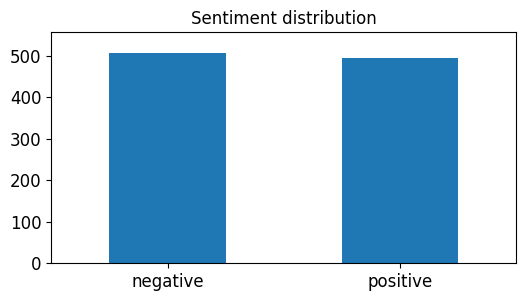

In [59]:
print(new_sample.sentiment.value_counts())

# plot barchart for new_sample
max_counts = max(new_sample.sentiment.value_counts())
new_sample.sentiment.value_counts().plot(kind = 'bar',
                                         title = 'Sentiment distribution',
                                         ylim = [0, max_counts + max_counts/10],
                                         rot = 0, fontsize = 12, figsize = (6,3))

<Axes: title={'center': 'Sentiment distribution'}>

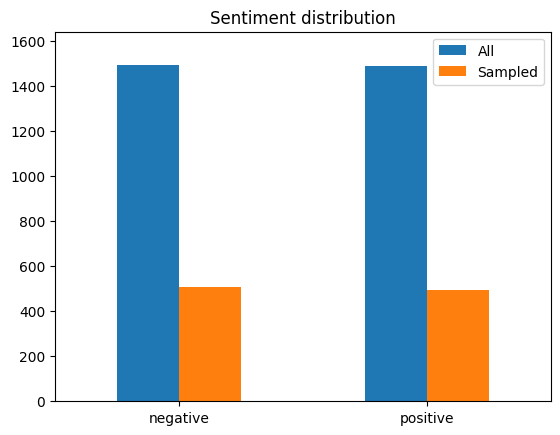

In [131]:
# plot data and sample together
all = new_data.sentiment.value_counts().to_frame().T
all.index = ['All']
sampled = new_sample.sentiment.value_counts().to_frame().T
sampled.index = ['Sampled']
max_counts = max(pd.concat([new_data.sentiment.value_counts(), new_sample.sentiment.value_counts()]))

pd.concat([all, sampled]).T.plot.bar(title='Sentiment distribution',
                                     ylim = [0, max_counts + max_counts/10],
                                     rot=0)

### Feature Creation

In [61]:
# tokenize
new_data['unigrams'] = new_data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [62]:
new_data[:5]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [63]:
new_data[:5]

,sentence,score,sentiment,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"


In [64]:
# list first sentence's unigrams
list(new_data[:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature Subset Selection

In [65]:
new_vect = CountVectorizer()
new_counts = new_vect.fit_transform(new_data.sentence) #learn the vocabulary and return document-term matrix
print(new_counts.shape)
print(new_counts[0])

(2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [200]:
for i in range(new_counts.shape[1]):
    if new_counts[0, i] >= 1:
        print(new_vect.get_feature_names_out()[i])

by
converter
for
go
here
in
is
it
me
no
plug
so
the
there
to
unless
us
way


In [70]:
analyze = new_vect.build_analyzer()
analyze(new_data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [71]:
analyze(" ".join(list(new_data[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [72]:
new_vect.get_feature_names_out()[:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [73]:
# convert from sparse array to normal array
new_counts[:5, :100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [74]:
for i in range(5):
    for j in range(100):
        if new_counts[i, j] >= 1:
            print(new_vect.get_feature_names_out()[j])

45


### Plotting Heatmap

In [75]:
# first twenty features only
plot_x = ["term_"+str(i) for i in new_vect.get_feature_names_out()[0:20]]
print(plot_x)

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


In [76]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(new_data.index)[0:20]]
print(plot_y)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19']


In [77]:
plot_z = new_counts[0:20, 0:20].toarray() #new_counts[how many documents, how many terms]
print(plot_z)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


,term_00,term_10,term_100,term_11,term_12,term_13,term_15,term_15g,term_15pm,term_17,term_18,term_18th,term_1928,term_1947,term_1948,term_1949,term_1971,term_1973,term_1979,term_1980
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


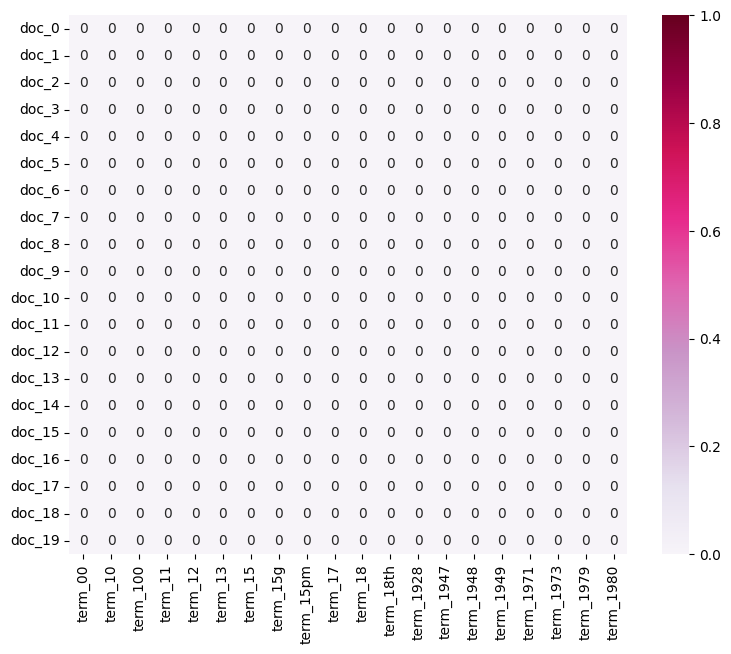

In [78]:
# draw heatmap
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

,top_1_freq,top_2_freq,top_3_freq,top_4_freq,top_5_freq,top_6_freq,top_7_freq,top_8_freq,top_9_freq,top_10_freq,top_11_freq,top_12_freq,top_13_freq,top_14_freq,top_15_freq,top_16_freq,top_17_freq,top_18_freq,top_19_freq,top_20_freq
doc_0,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
doc_1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
doc_4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,4,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
doc_6,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
doc_7,2,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


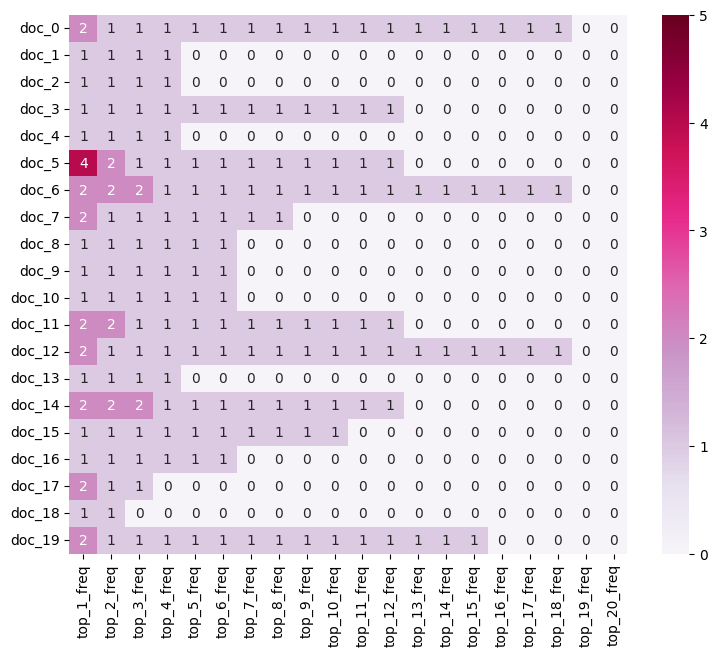

In [79]:
plot_x = ["top_"+str(i+1)+"_freq" for i in list(new_data.index)[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_data.index)[0:20]]
# new_counts[no. of doc., top no. freq. of corresponding doc.]
new_crop = new_counts[:20, :].toarray()
new_crop.sort(axis=1)
plot_z = new_crop[:, ::-1][:20, :20]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

### Dimensionality Reduction

In [80]:
# reduce to 2 dimension
print(new_counts.shape)
new_reduced = PCA(n_components = 2).fit_transform(new_counts.toarray())
print(new_reduced.shape)

(2983, 5155)
(2983, 2)


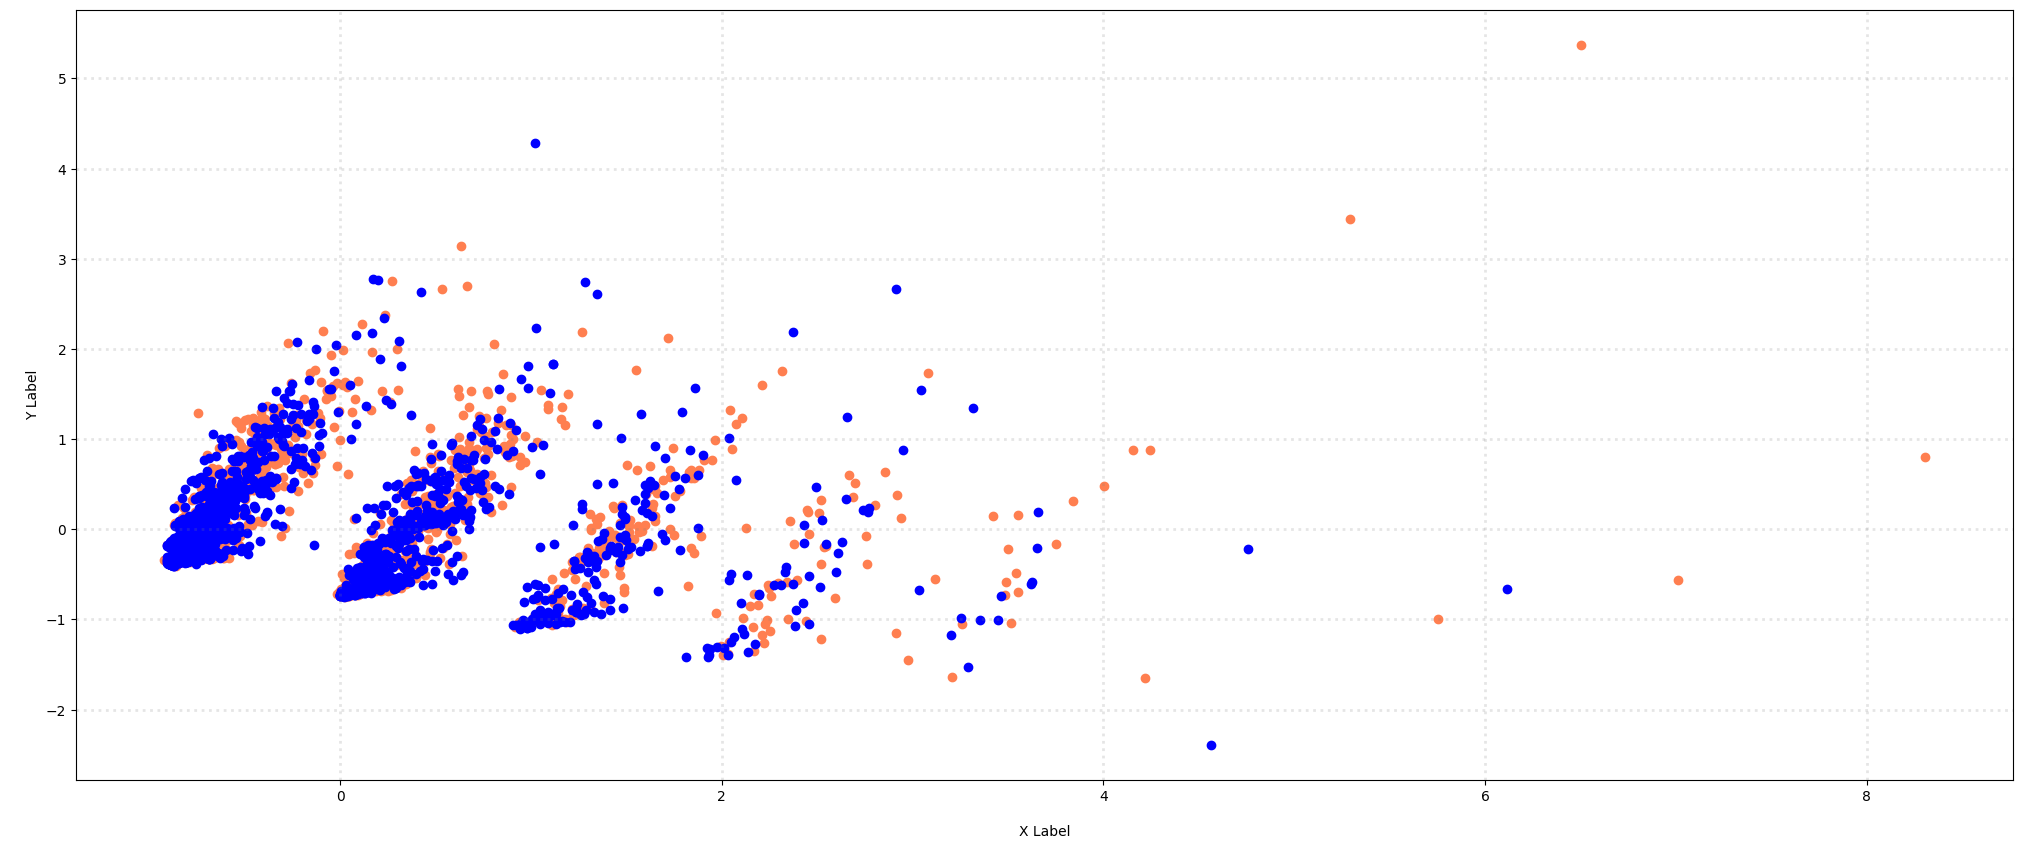

In [81]:
sentiments = ['positive', 'negative']
col = ['coral', 'blue']

# plot 2D
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiment in zip(col, sentiments):
    xs = new_reduced[new_data['sentiment'] == sentiment].T[0]
    ys = new_reduced[new_data['sentiment'] == sentiment].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [82]:
# reduce to 3 dimension
new_re3d = PCA(n_components = 3).fit_transform(new_counts.toarray())

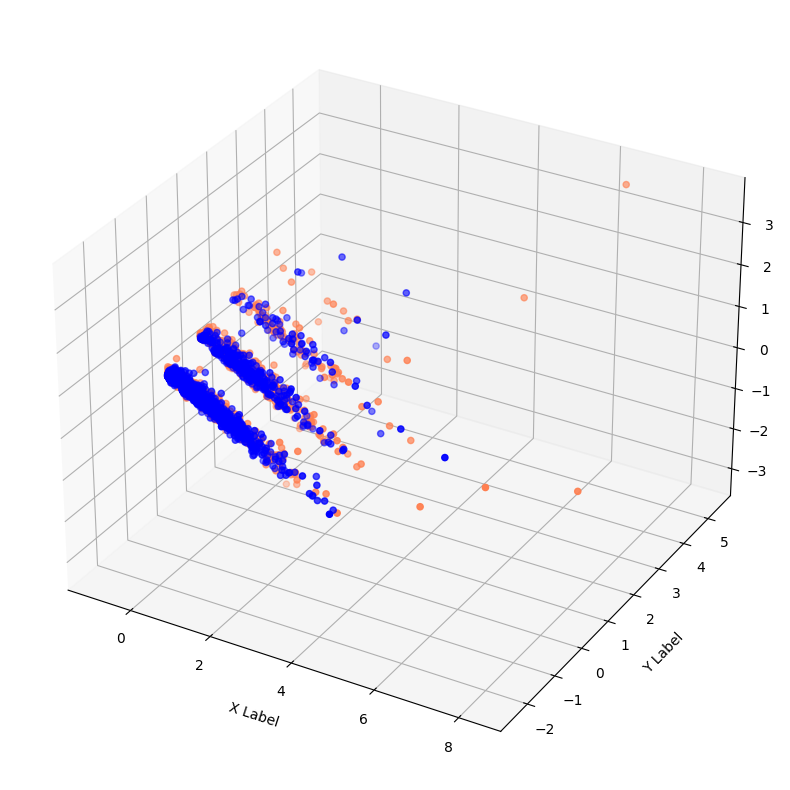

In [83]:
# plot 3D
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, sentiment in zip(col, sentiments):
    xs = new_re3d[new_data['sentiment'] == sentiment].T[0]
    ys = new_re3d[new_data['sentiment'] == sentiment].T[1]
    zs = new_re3d[new_data['sentiment'] == sentiment].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()

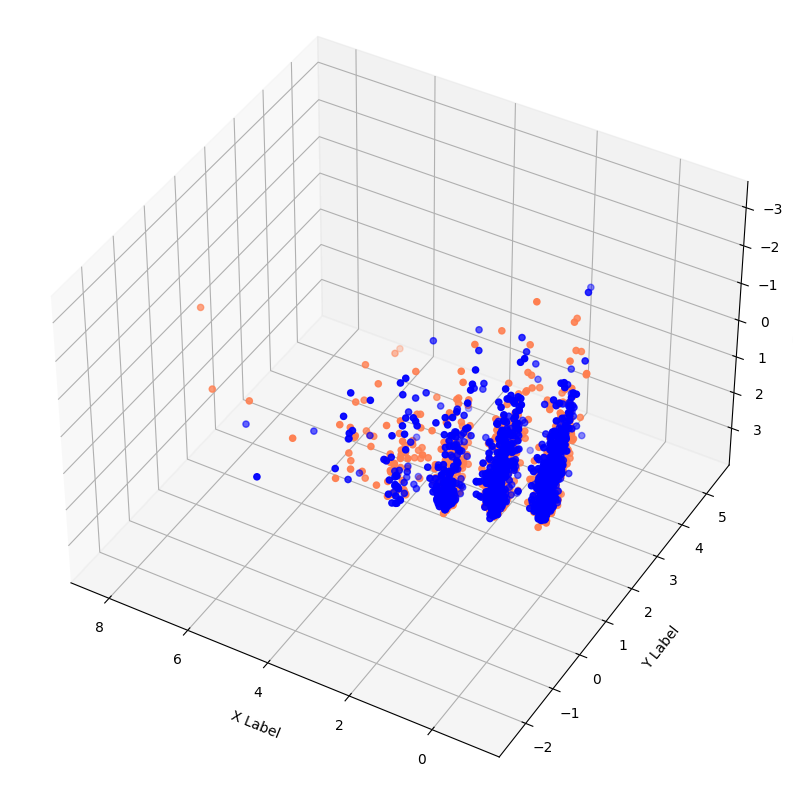

In [84]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, sentiment in zip(col, sentiments):
    xs = new_re3d[new_data['sentiment'] == sentiment].T[0]
    ys = new_re3d[new_data['sentiment'] == sentiment].T[1]
    zs = new_re3d[new_data['sentiment'] == sentiment].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(-140, 60)
plt.show()

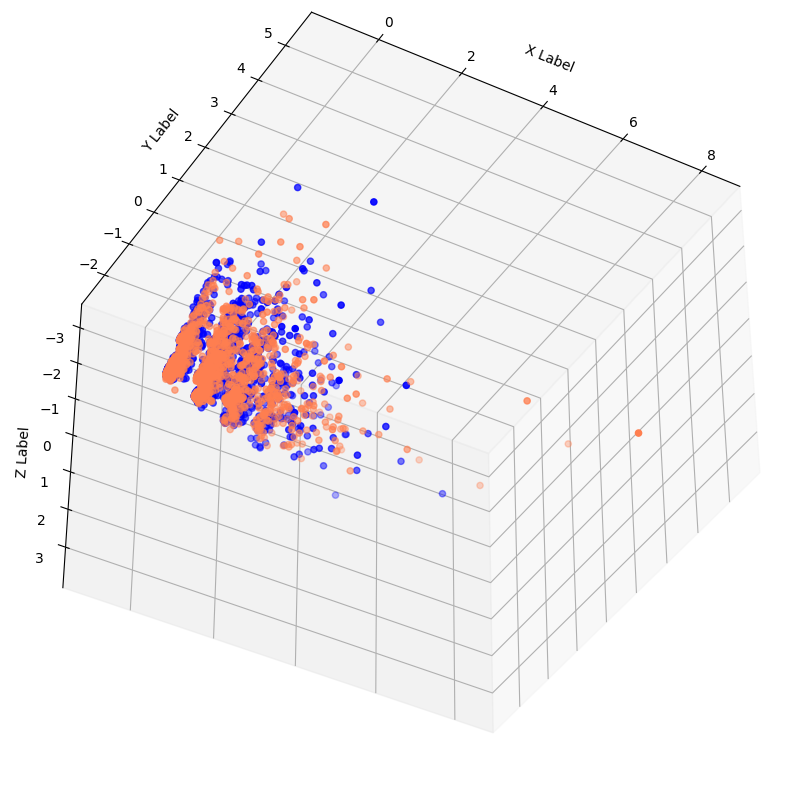

In [85]:
fig = plt.figure(figsize = (25, 10))
ax = fig.add_subplot(111, projection = '3d')

for c, sentiment in zip(col, sentiments):
    xs = new_re3d[new_data['sentiment'] == sentiment].T[0]
    ys = new_re3d[new_data['sentiment'] == sentiment].T[1]
    zs = new_re3d[new_data['sentiment'] == sentiment].T[2]

    ax.scatter(xs, ys, zs, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(140, -60)
plt.show()

### Attribute Transformation / Aggregation

In [86]:
# sums up frequencies
new_frequencies = []
print(new_counts.shape[1])
for j in range(0,new_counts.shape[1]):
    new_frequencies.append(sum(new_counts[:,j].toarray()))

5155


In [87]:
new_frequencies = np.asarray(new_counts.sum(axis=0))[0] # convert to 1D array

In [88]:
new_frequencies[0] # sum of first term

1

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


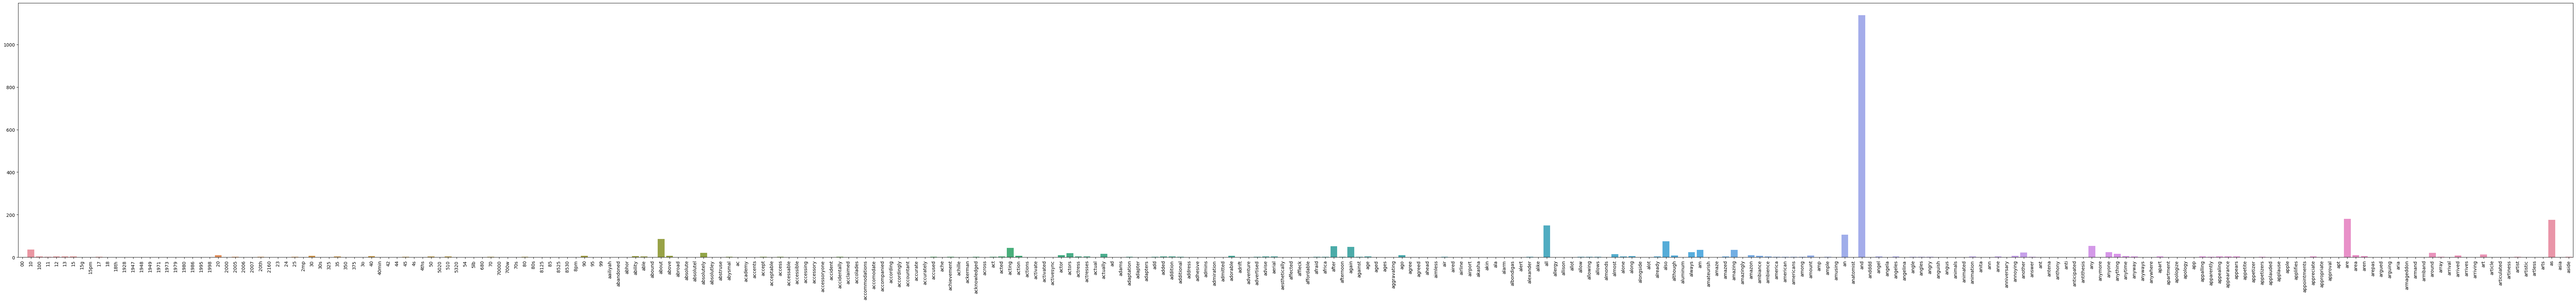

In [89]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_vect.get_feature_names_out()[:300],
                y=new_frequencies[:300])
g.set_xticklabels(new_vect.get_feature_names_out()[:300], rotation = 90)

In [90]:
# visualization using plotly
# need to execute the block to get correct figure

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Range of bars:"),
    dcc.RangeSlider(id="range_slider", min=0, max=500, value=[0, 150], step=25,
                    pushable=25, marks=None, tooltip={"placement":"bottom", "always_visible": True}),
])


@app.callback(
    Output("graph", "figure"),
    Input("range_slider", "value"))
def update_bar_chart(interval):
    data = new_frequencies[interval[0]:interval[1]] # replace with your own data source
    fig = go.Figure(
        data=[go.Bar(y=data)],
        layout_title_text="Interactive new term frequencies chart"
    )
    return fig

app.run_server()

<IPython.core.display.Javascript object>

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


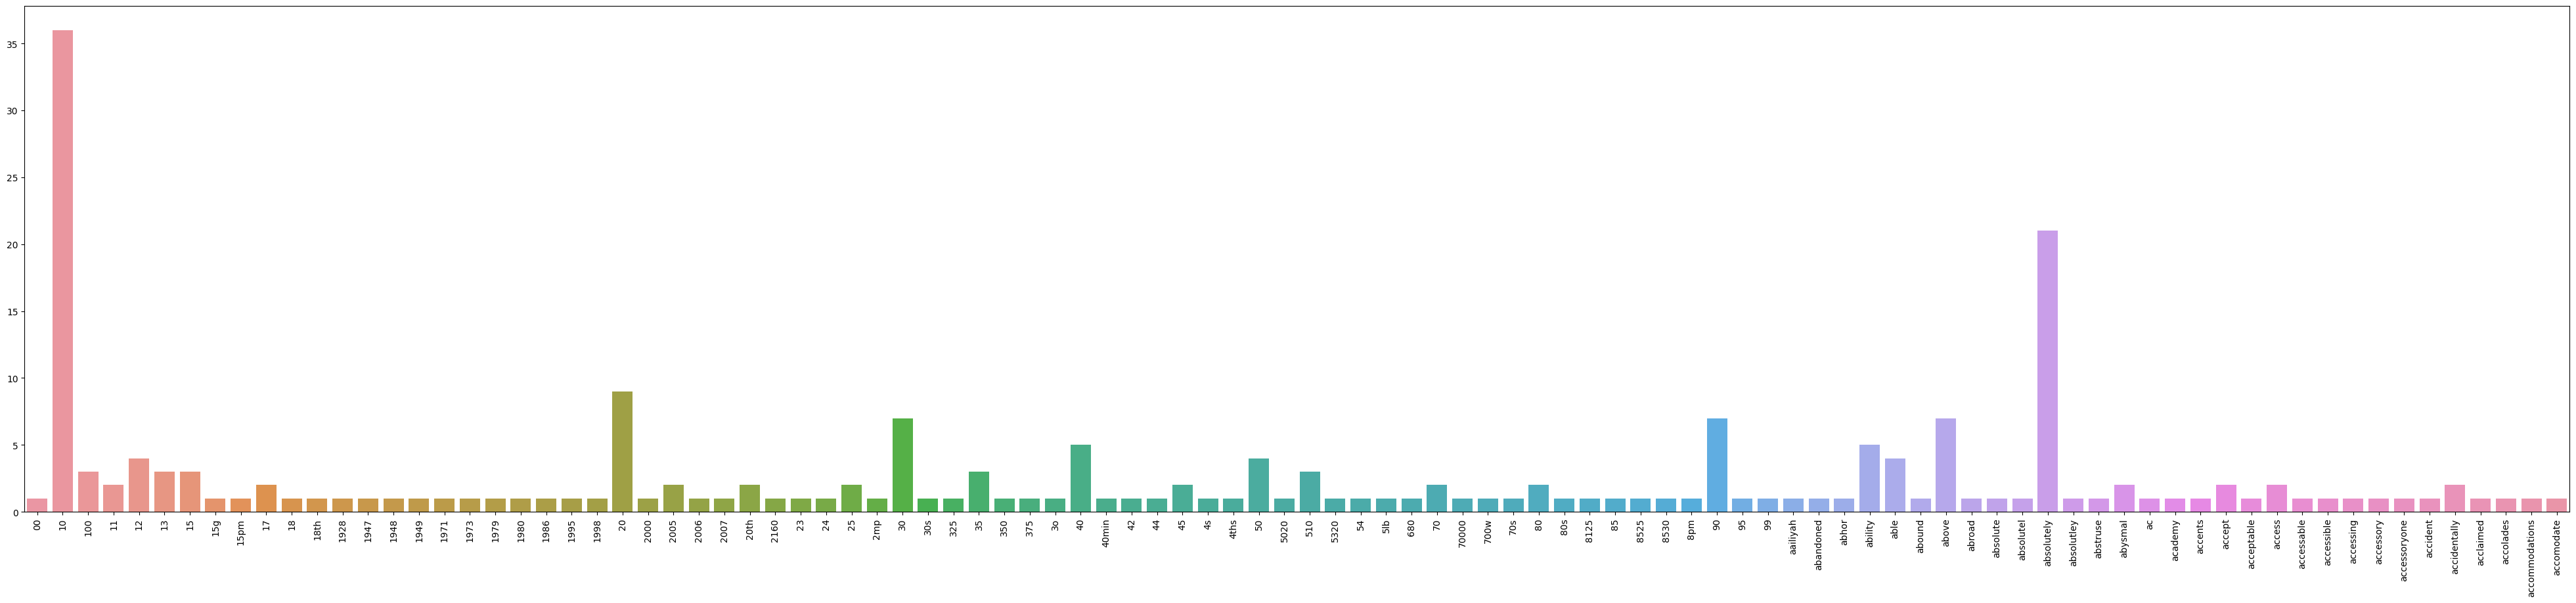

In [206]:
# reduce the # of terms
# fetch features with freq. less than 50, showing first 100 features
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=new_vect.get_feature_names_out()[new_frequencies[:] <= 50][:100],
                y=new_frequencies[new_frequencies[:] <= 50][:100])
g.set_xticklabels(new_vect.get_feature_names_out()[new_frequencies[:] <= 50][:100], rotation = 90)

In [92]:
# long tail
desc_index = []
desc_freq = []
desc_name = []

desc_index = np.argsort(new_frequencies)[::-1]
desc_freq = np.sort(new_frequencies)[::-1]
for i in range(300):
    desc_name.append(new_vect.get_feature_names_out()[desc_index[i]])

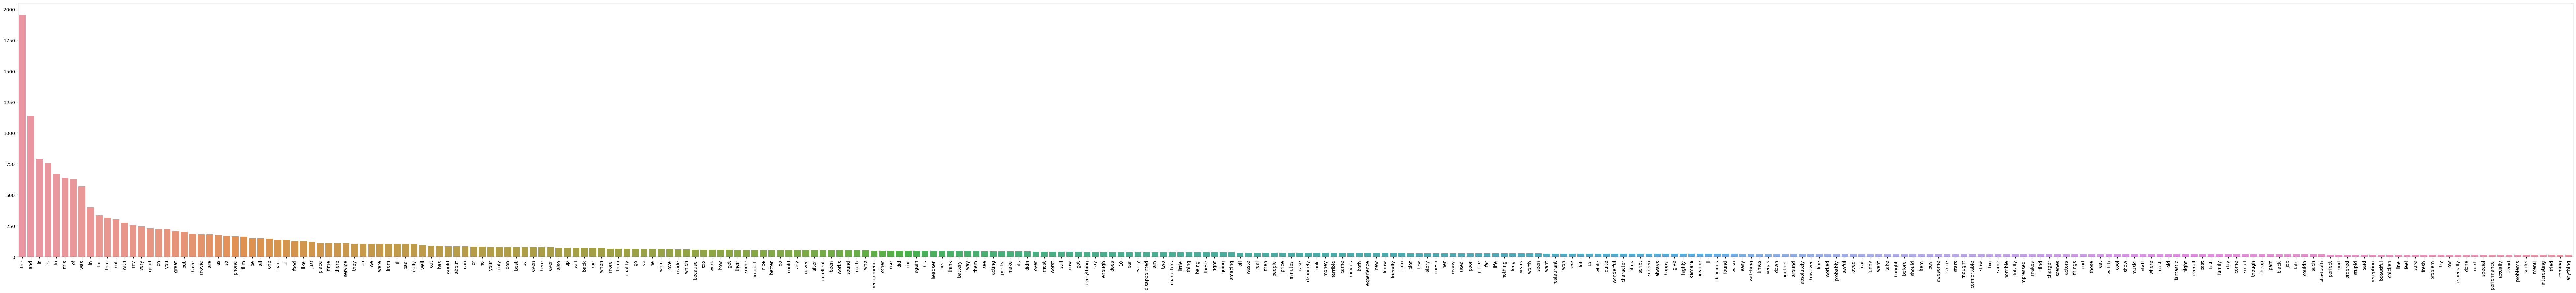

In [93]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=desc_name[:300],
                y=desc_freq[:300])
g.set_xticklabels(desc_name[:300], rotation = 90);

In [94]:
# log-ify
import math
new_frequencies_log = [math.log(i) for i in new_frequencies]

[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


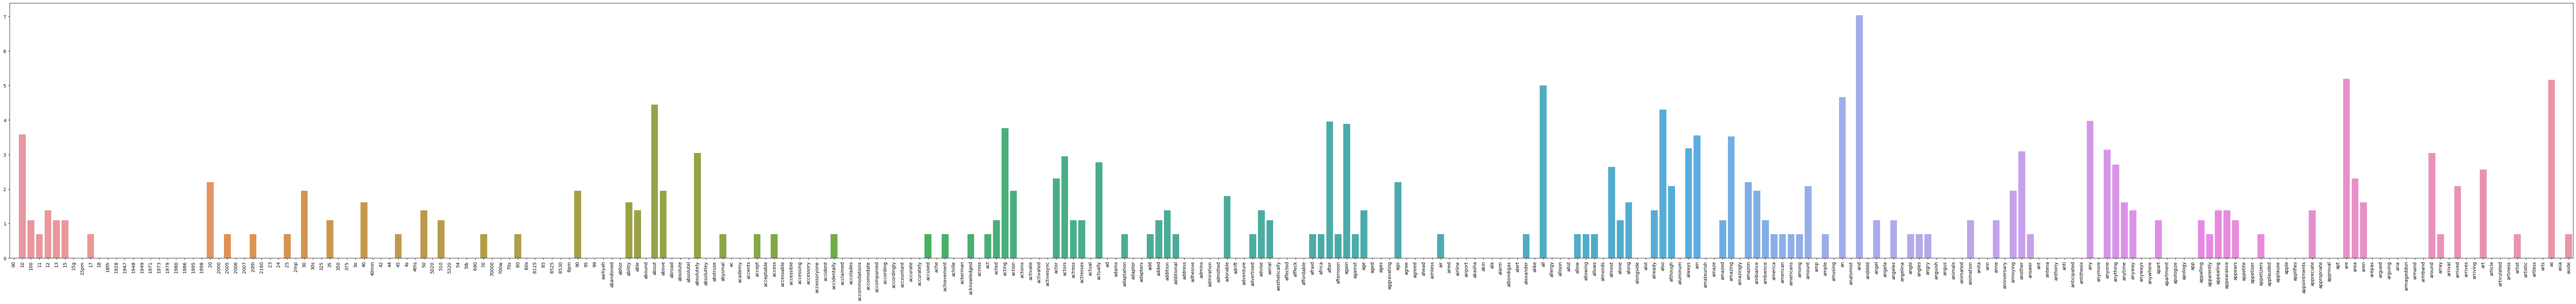

In [95]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=new_vect.get_feature_names_out()[:300],
                y=new_frequencies_log[:300])
g.set_xticklabels(new_vect.get_feature_names_out()[:300], rotation = 90)

### Discretization and Binarization

In [96]:
mlb.fit(new_data.score)
new_data['bin_score'] = mlb.transform(new_data['score']).tolist()
new_data[:10]

,sentence,score,sentiment,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]
9,What a waste of money and time!.,0,negative,"[What, a, waste, of, money, and, time, !, .]",[0]


In [97]:
mlb.fit(new_data.sentiment)
new_data['bin_sentiment'] = mlb.transform(new_data['sentiment']).tolist()
new_data[:10]

,sentence,score,sentiment,unigrams,bin_score,bin_sentiment
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0],[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1],[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1],[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0],[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1],[1]
5,I have to jiggle the plug to get it to line up...,0,negative,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0],[0]
6,If you have several dozen or several hundred c...,0,negative,"[If, you, have, several, dozen, or, several, h...",[0],[0]
7,If you are Razr owner...you must have this!,1,positive,"[If, you, are, Razr, owner, ..., you, must, ha...",[1],[1]
8,"Needless to say, I wasted my money.",0,negative,"[Needless, to, say, ,, I, wasted, my, money, .]",[0],[0]
9,What a waste of money and time!.,0,negative,"[What, a, waste, of, money, and, time, !, .]",[0],[0]


### Data Exploration

In [98]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = new_data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = new_data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = new_data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [99]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [100]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = new_vect.transform(document_to_transform_1)
document_vector_count_2 = new_vect.transform(document_to_transform_2)
document_vector_count_3 = new_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [101]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000




---



# **3. Third part**

### TF-IDF

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
new_tfidfcounts = tfidf_vect.fit_transform(new_data.sentence)
print(new_tfidfcounts.shape)
print(new_tfidfcounts[0])

(2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [202]:
for i in range(new_tfidfcounts.shape[1]):
    if new_tfidfcounts[0, i] > 0:
        print(tfidf_vect.get_feature_names_out()[i])

by
converter
for
go
here
in
is
it
me
no
plug
so
the
there
to
unless
us
way


In [107]:
tfidf_analyze = tfidf_vect.build_analyzer()
tfidf_analyze(new_data.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [108]:
tfidf_vect.get_feature_names_out()[:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [109]:
new_tfidfcounts[:5, :100].toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [110]:
for i in range(5):
    for j in range(100):
        if new_tfidfcounts[i, j] > 0:
            print(tfidf_vect.get_feature_names_out()[j])

45


,top_1_tfidf,top_2_tfidf,top_3_tfidf,top_4_tfidf,top_5_tfidf,top_6_tfidf,top_7_tfidf,top_8_tfidf,top_9_tfidf,top_10_tfidf,top_11_tfidf,top_12_tfidf,top_13_tfidf,top_14_tfidf,top_15_tfidf,top_16_tfidf,top_17_tfidf,top_18_tfidf,top_19_tfidf,top_20_tfidf
doc_0,0.398455,0.331967,0.308682,0.295387,0.275437,0.249128,0.231491,0.228627,0.223366,0.223366,0.222747,0.207585,0.187397,0.156412,0.127440,0.120689,0.119674,0.086610,0.0,0.0
doc_1,0.633628,0.512627,0.472087,0.335951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_2,0.822358,0.402058,0.352199,0.195022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_3,0.377294,0.358880,0.358880,0.358880,0.345815,0.280105,0.277509,0.252821,0.219197,0.218503,0.148105,0.120671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_4,0.836456,0.421296,0.284763,0.204354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_5,0.463124,0.440073,0.362004,0.291875,0.280442,0.280442,0.271395,0.238550,0.205256,0.166174,0.108726,0.078687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_6,0.460108,0.293313,0.287652,0.278998,0.268841,0.268841,0.260963,0.233126,0.222176,0.193285,0.191056,0.184182,0.164425,0.162204,0.154498,0.134642,0.134642,0.063756,0.0,0.0
doc_7,0.478900,0.452655,0.452655,0.377060,0.274763,0.243432,0.239450,0.163088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_8,0.565338,0.490234,0.410955,0.402210,0.265497,0.197273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
doc_9,0.517098,0.511435,0.455311,0.399237,0.252768,0.201132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


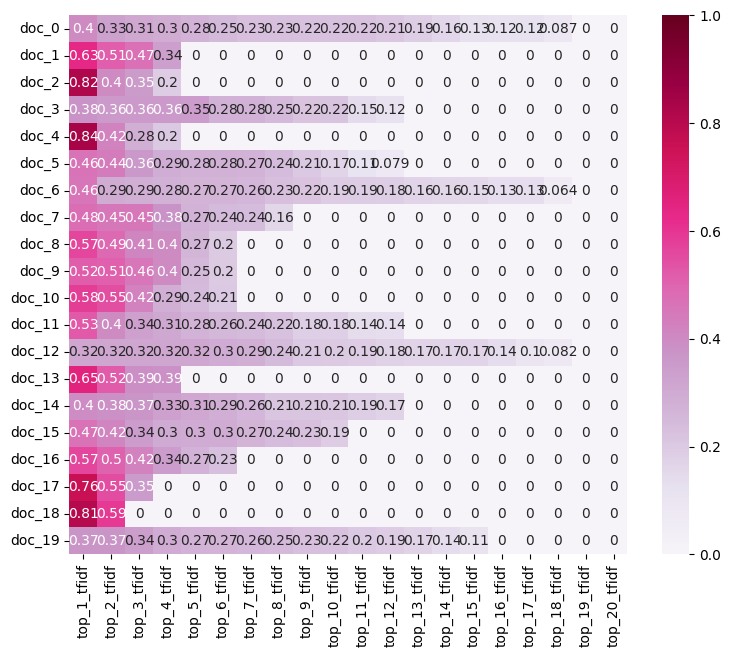

In [111]:
plot_x = ["top_"+str(i+1)+"_tfidf" for i in list(new_data.index)[0:20]]
plot_y = ["doc_"+ str(i) for i in list(new_data.index)[0:20]]
# tfidf_counts[no. of doc., top no. tfidf of corresponding doc.]
tfidf_crop = new_tfidfcounts[:20, :].toarray()
tfidf_crop.sort(axis=1)
plot_z = tfidf_crop[:, ::-1][:20, :20]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Naive Bayes classifier

In [112]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# word freq.
pos_frequencies = []
neg_frequencies = []
for j in range(0, new_counts.shape[1]):
    pos_frequencies.append(sum(new_counts[new_data['sentiment'] == 'positive', j].toarray()))
    neg_frequencies.append(sum(new_counts[new_data['sentiment'] == 'negative', j].toarray()))

In [113]:
# an array [arr(word count of positive), arr(word count of negative)]
sentiment_counts = np.concatenate((pos_frequencies, neg_frequencies), axis=1).T
sentiment_counts

array([[ 0, 23,  2, ...,  0,  0,  0],
       [ 1, 13,  1, ...,  1,  2,  1]])

In [114]:
positive_sentiment = np.array([1, 0]) # 1 = positve, 0 = negative
mnb.fit(sentiment_counts, positive_sentiment)

MultinomialNB()

In [115]:
print(new_vect.transform(["that's pretty bad.", "that's pretty good."]))

  (0, 373)	1
  (0, 3467)	1
  (0, 4529)	1
  (1, 1993)	1
  (1, 3467)	1
  (1, 4529)	1


In [116]:
mnb.predict(new_vect.transform(["that's pretty bad.", "that's pretty good."]))

array([0, 1])

In [117]:
# TF-IDF
pos_tfidf = []
neg_tfidf = []
for j in range(0, new_tfidfcounts.shape[1]):
    pos_tfidf.append(sum(new_tfidfcounts[new_data['sentiment'] == 'positive', j].toarray()))
    neg_tfidf.append(sum(new_tfidfcounts[new_data['sentiment'] == 'negative', j].toarray()))

In [118]:
# an array [arr(word count of positive), arr(word count of negative)]
sentiment_tfidfcounts = np.concatenate((pos_tfidf, neg_tfidf), axis=1).T
sentiment_tfidfcounts

array([[0.        , 8.57100872, 0.85360938, ..., 0.        , 0.        ,
        0.        ],
       [0.33842986, 3.81528256, 0.35148203, ..., 0.53914839, 0.54846675,
        0.31889744]])

In [119]:
mnb.fit(sentiment_tfidfcounts, positive_sentiment)

MultinomialNB()

In [120]:
print(tfidf_vect.transform(["that's pretty bad.", "that's pretty good."]))

  (0, 4529)	0.43473327873310014
  (0, 3467)	0.6838273741328273
  (0, 373)	0.5859924050263543
  (1, 4529)	0.4638880985543723
  (1, 3467)	0.7296873642854015
  (1, 1993)	0.5023586193366576


In [121]:
mnb.predict(tfidf_vect.transform(["that's pretty bad.", "that's pretty good."]))

array([0, 1])

### Visualization

In [183]:
desc_pos = []
desc_neg = []

for i in range(300):
    desc_pos.append(pos_frequencies[desc_index[i]])
    desc_neg.append(neg_frequencies[desc_index[i]])

In [184]:
visual_data = pd.DataFrame(np.concatenate((desc_pos, desc_neg)), columns=['freq'])
visual_data['sentiment'] = np.concatenate([np.repeat('positive', 300), np.repeat('negative', 300)])
visual_data['feature'] = np.concatenate([desc_name[:300], desc_name[:300]])
visual_data

,freq,sentiment,feature
0,995,positive,the
1,674,positive,and
2,382,positive,it
3,416,positive,is
4,307,positive,to
...,...,...,...
595,3,negative,menu
596,1,negative,interesting
597,5,negative,tried
598,10,negative,coming


In [188]:
import plotly.express as px

fig = px.bar(visual_data, x='feature', y='freq', color='sentiment', title='Feature Names in Descending Frequencies',
             labels={'feature':'Feature Name', 'freq':'Frequency'})
fig.show()

# **4. Fourth part**

In Feature Creation part, the unigrams didn't provide much useage, there is still a lot of less meaningful characters like punctuations.Even after using vectorizer, some random unigram still remain.Maybe we can drop some features based on their overall frequency and frequencies in each categories.

In Dimensionality Reduction part, it didn't mention other matrix decomposition algorithms except for PCA.